In [765]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [766]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,FunctionTransformer, PowerTransformer, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score


In [767]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [769]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [770]:
for col in df.columns:
    print(f'{col} : {df[col].nunique()}')

Age : 43
Attrition : 2
BusinessTravel : 3
DailyRate : 886
Department : 3
DistanceFromHome : 29
Education : 5
EducationField : 6
EmployeeCount : 1
EmployeeNumber : 1470
EnvironmentSatisfaction : 4
Gender : 2
HourlyRate : 71
JobInvolvement : 4
JobLevel : 5
JobRole : 9
JobSatisfaction : 4
MaritalStatus : 3
MonthlyIncome : 1349
MonthlyRate : 1427
NumCompaniesWorked : 10
Over18 : 1
OverTime : 2
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StandardHours : 1
StockOptionLevel : 4
TotalWorkingYears : 40
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


We see that 'EmployeeCount', 'Over18', 'StandardHours' have only 1 unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [771]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1, inplace=True)

In [772]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [773]:
df.shape

(1470, 31)

**Separating numerical and categorical columns for eda**

In [774]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
len(num_cols)

23

In [775]:
cat_cols = df.select_dtypes(['object', 'category']).columns
print(cat_cols)
len(cat_cols)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


8

## **EXPLORATORY DATA ANALYSIS**

## **Univariate Analysis:**
- countplot for categorical features
- histplot and box plot for numerical features

<Axes: xlabel='Attrition'>

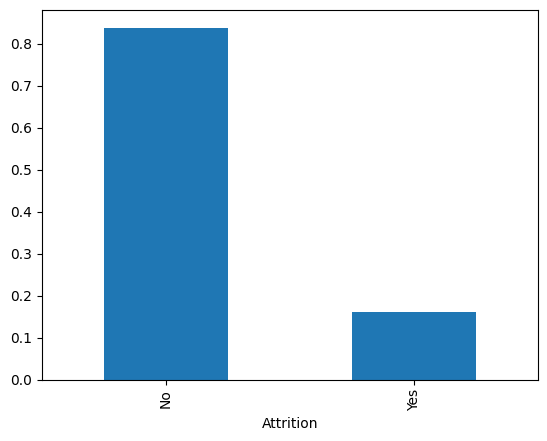

In [776]:
df['Attrition'].value_counts(normalize=True).plot(kind='bar')

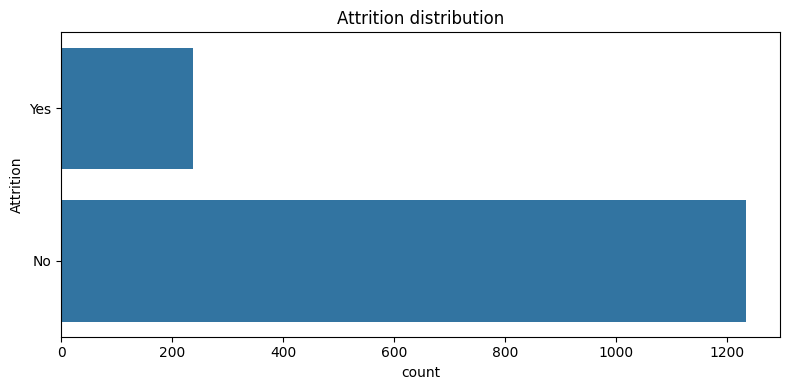

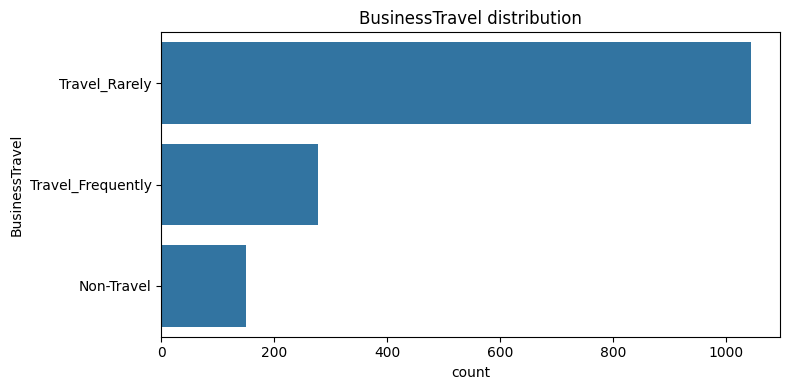

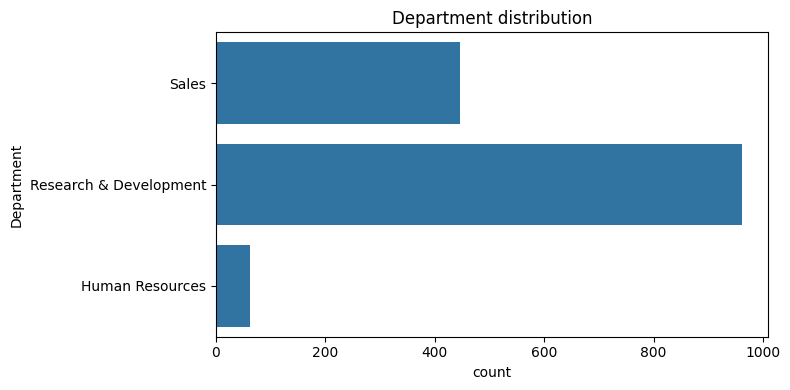

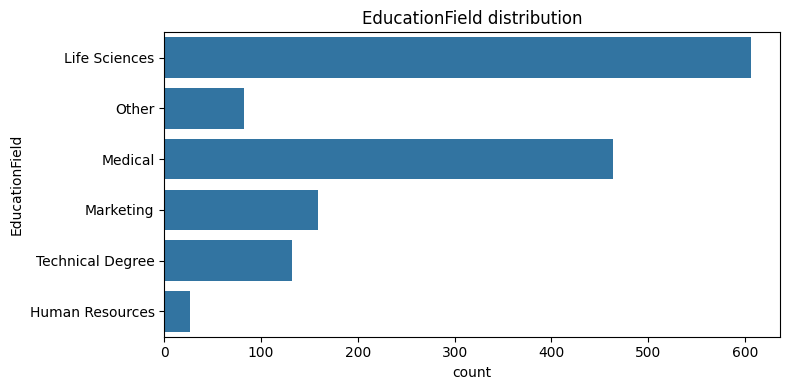

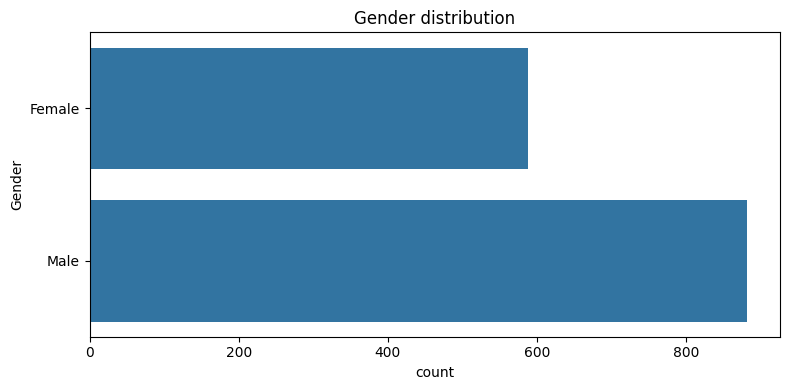

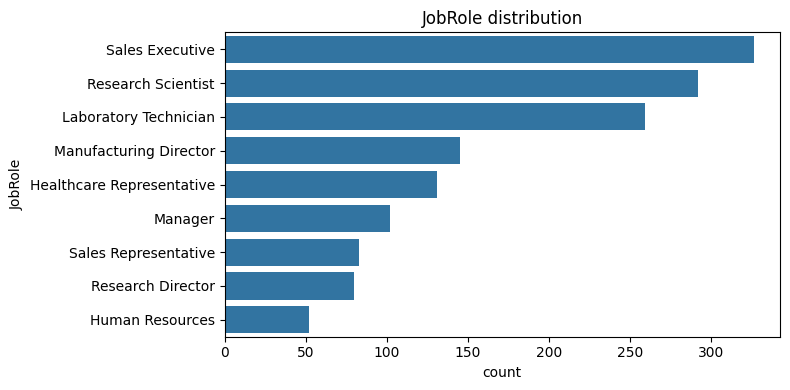

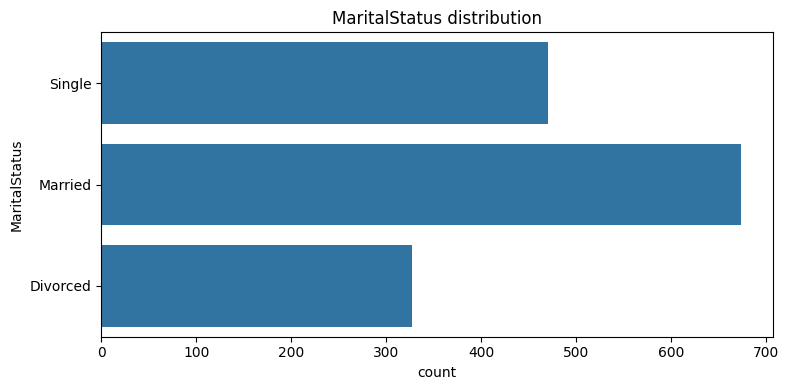

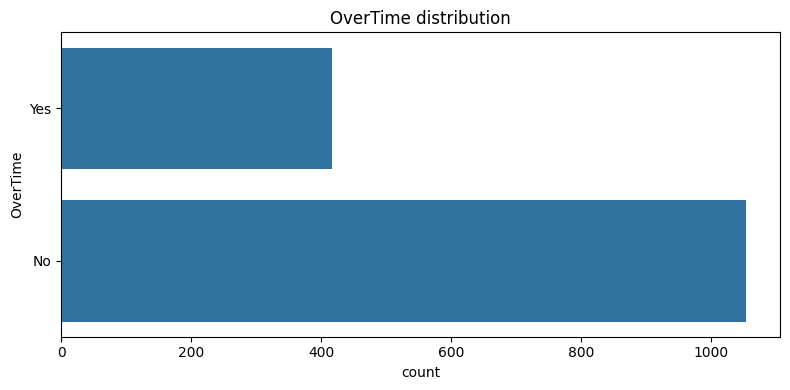

In [777]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, y=col)
    plt.title(f'{col} distribution')
    plt.tight_layout()
    plt.show()

## Insights:
- Attrition: Highly imbalanced — most employees stayed.

- Gender: Slightly more males than females.

- OverTime: Many employees do overtime — may link to attrition.

- EducationField: Some fields dominate (e.g., Life Sciences).

- Department: Fairly balanced across departments.

- BusinessTravel: Most employees travel rarely.

- MaritalStatus: Good spread across categories.

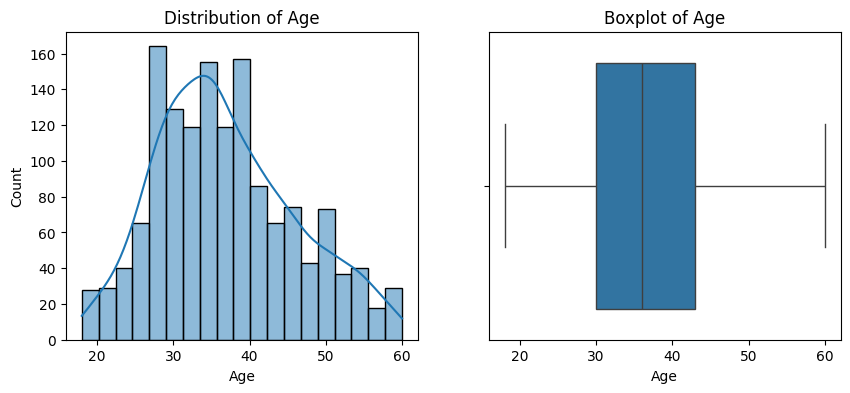

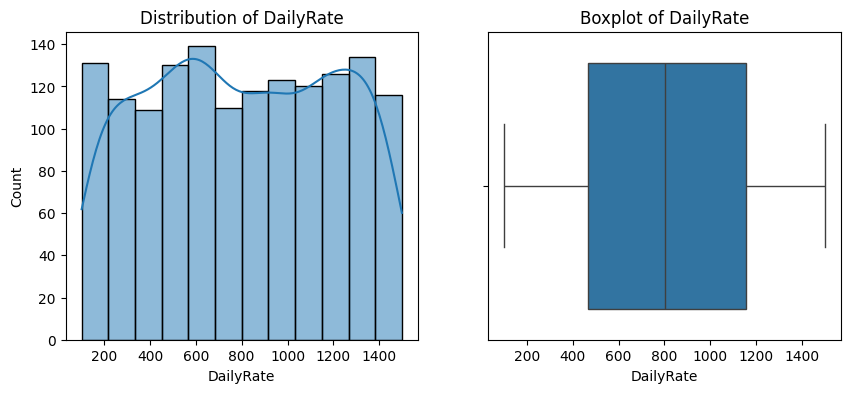

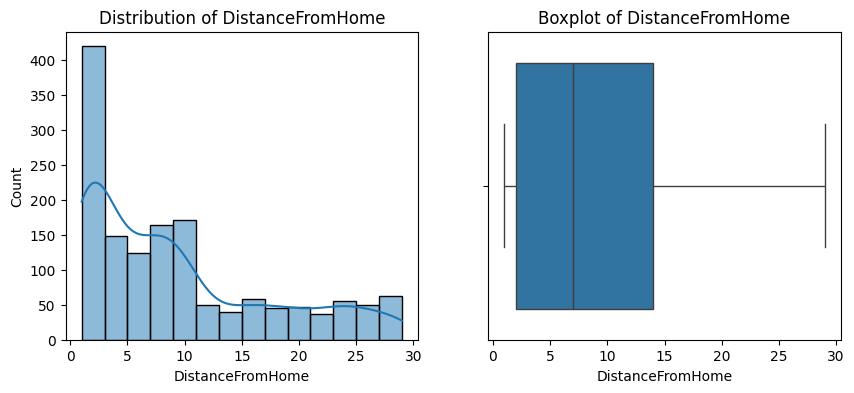

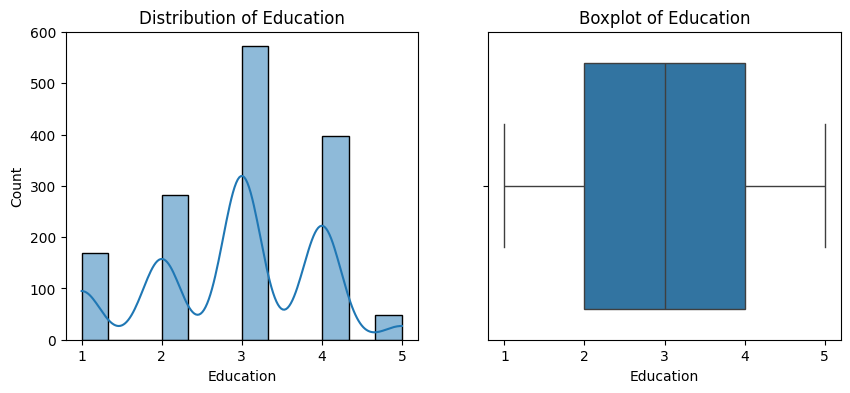

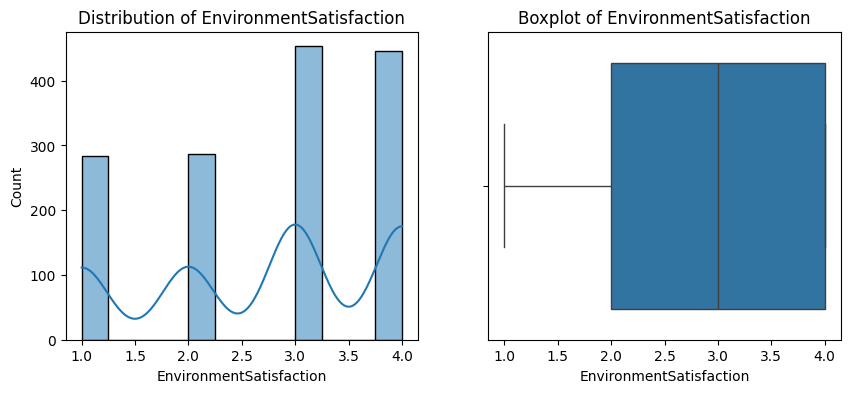

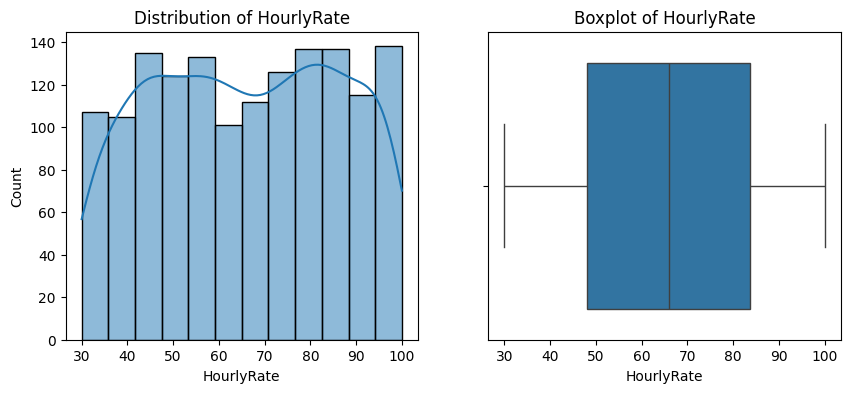

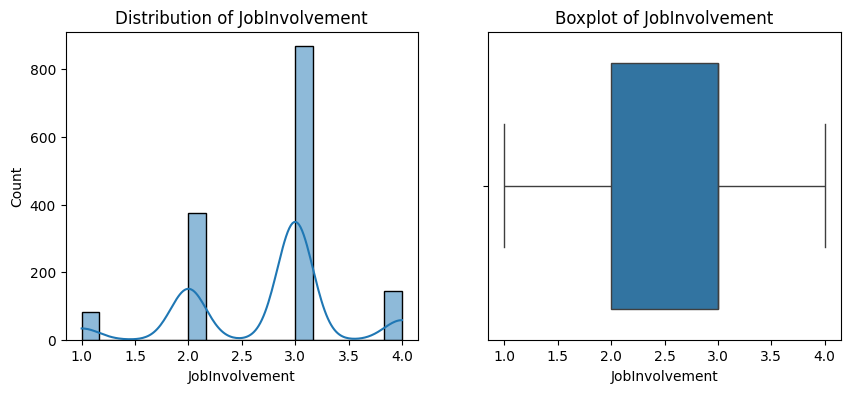

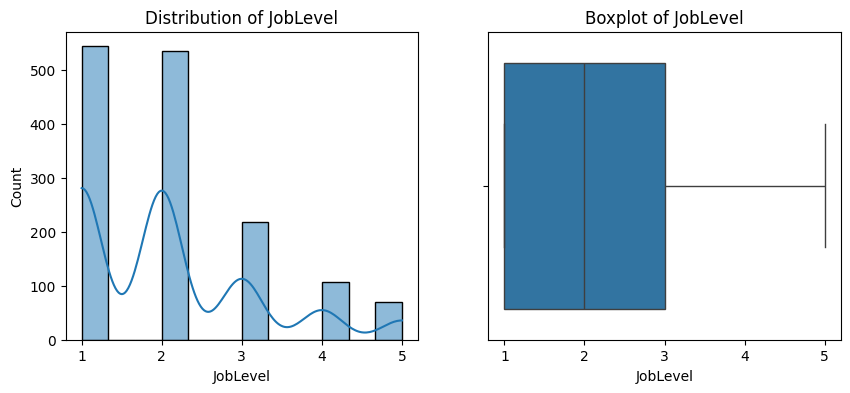

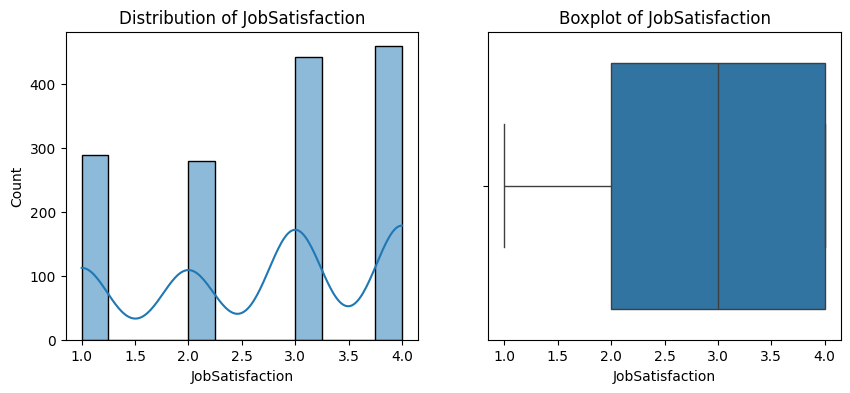

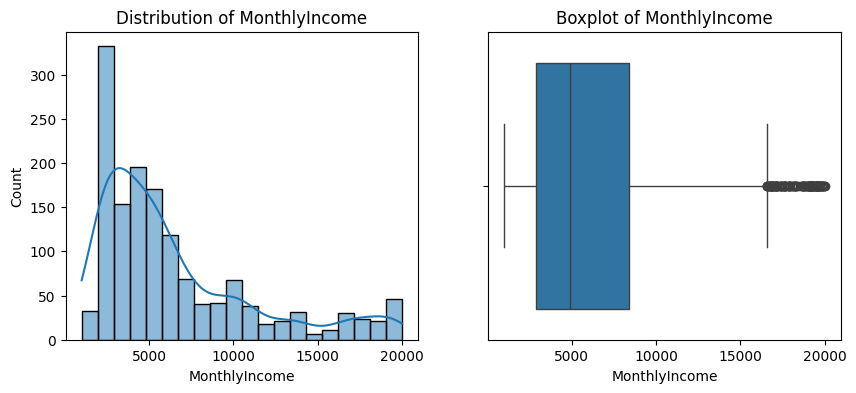

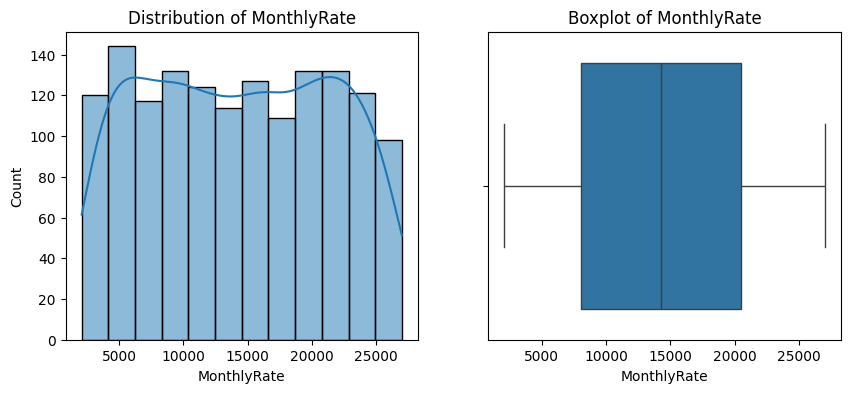

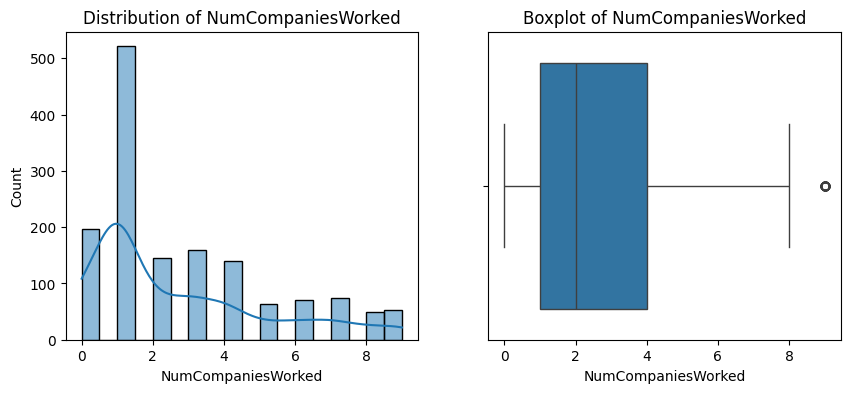

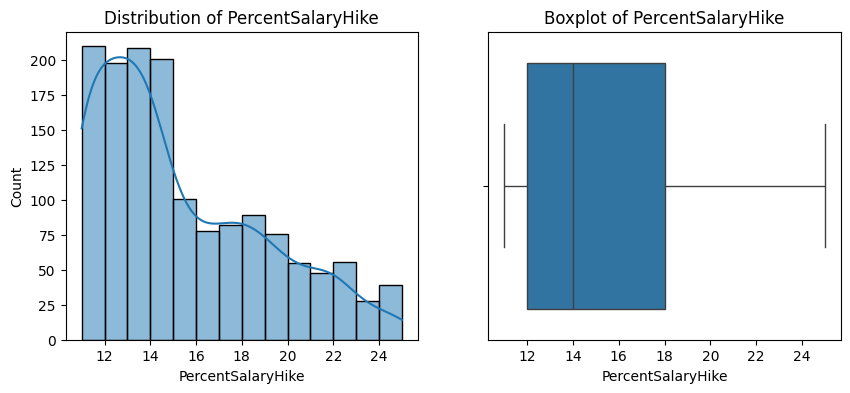

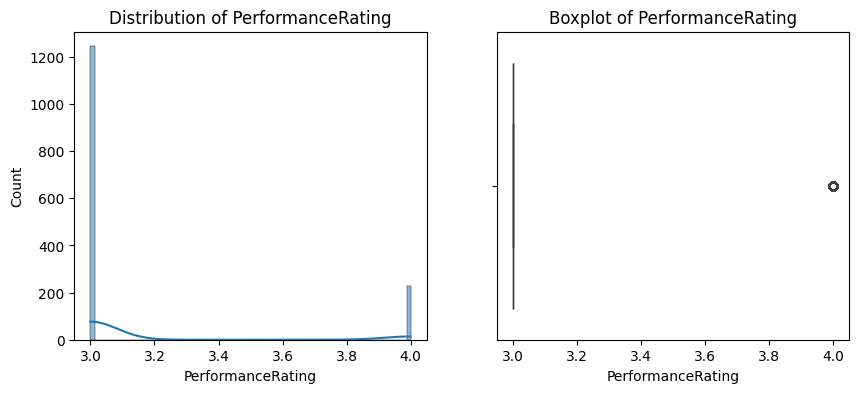

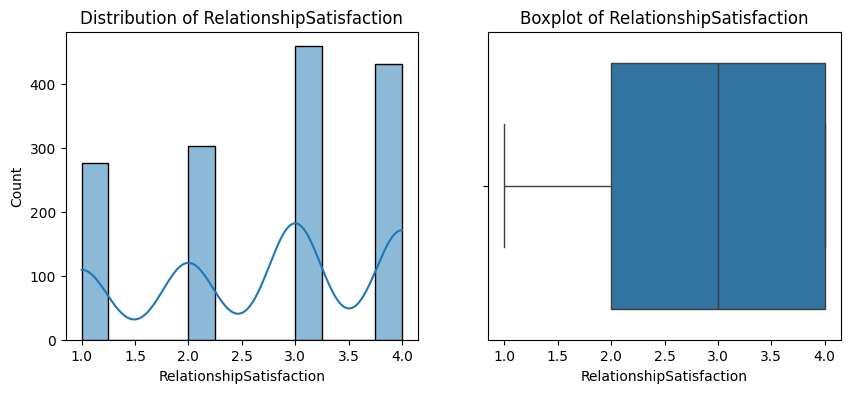

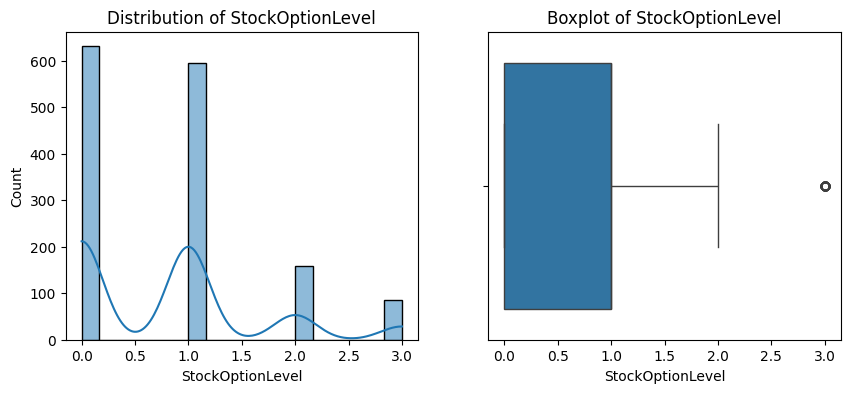

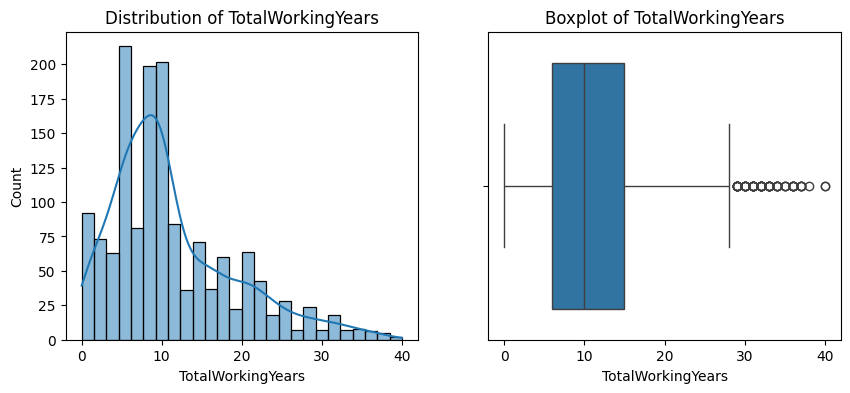

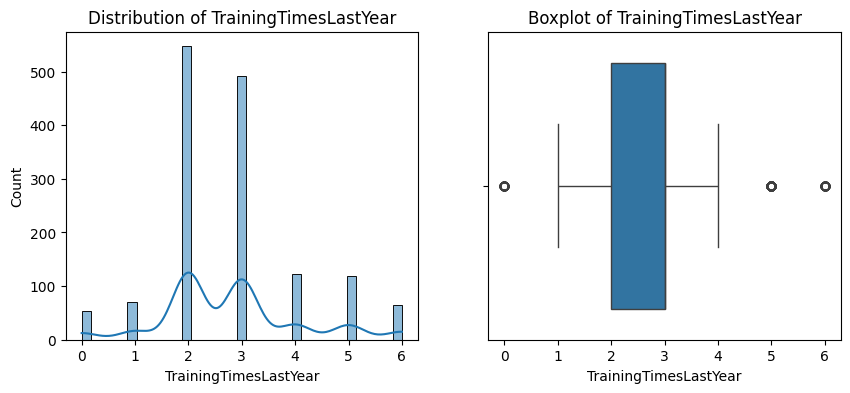

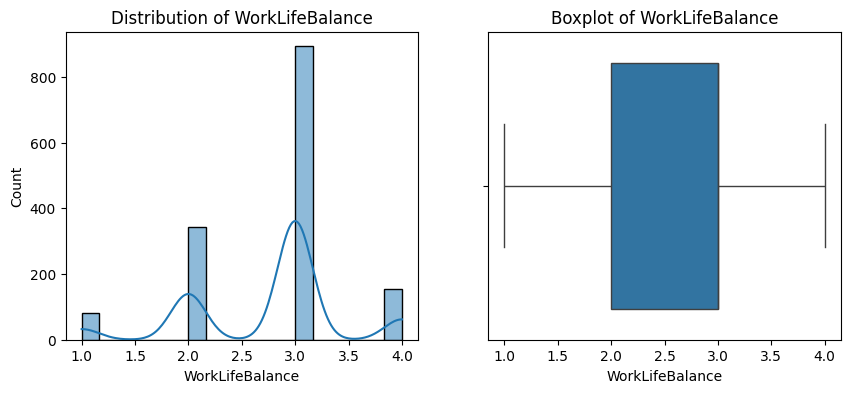

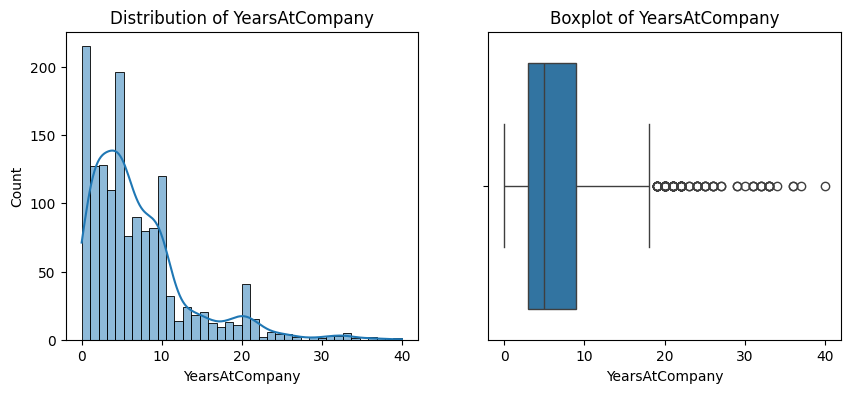

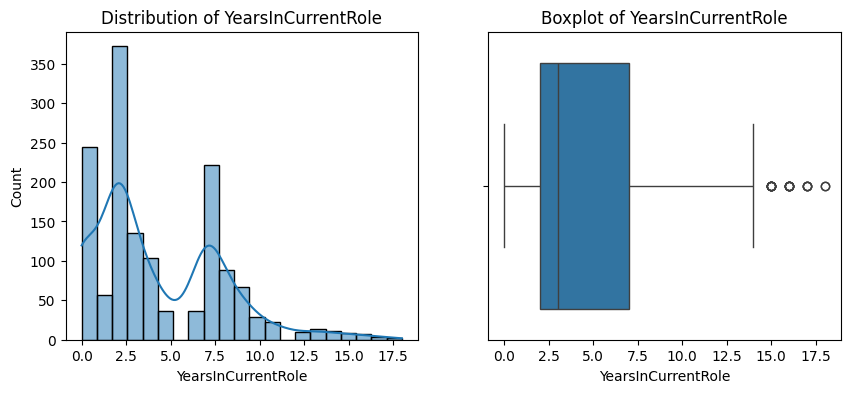

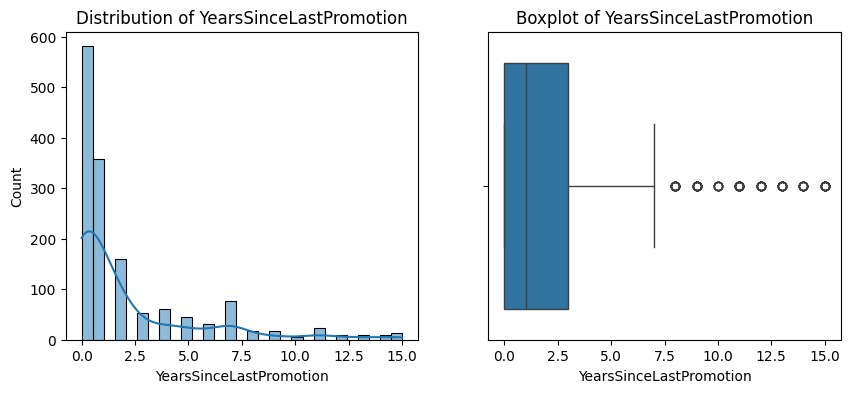

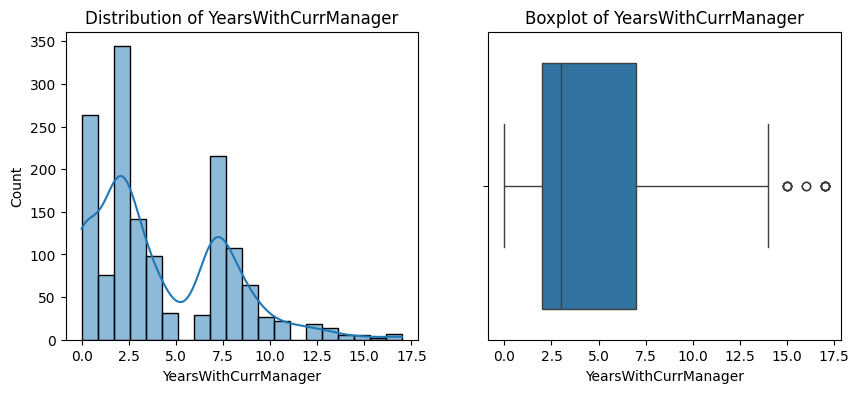

In [778]:
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(x=col, data=df, kde=True)
    plt.title(f'Distribution of {col}')
    plt.subplot(1,2,2)
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()

## Insights: 
- **right skewed cols**: DistanceFromHome, jobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager, Age

- **cols with outliers**: YearsWithCurrentManager, YearsSinceLastPromotion, YearsAtCompany, YearsInCurrentRole, TrainingTimesLastYear,TotalWorkingYears, MonthlyIncome

- **Cols with only 1 outlier**:
NumCompaniesWorked, StockOptionLevel

- **ordinal but numeric-looking columns**:
Education, JobLevel, WorkLifeBalance, RelationshipSatisfaction, JobSatisfaction, JobInvolvement, EnvironmentSatisfaction, PerformanceRating



In [779]:
ordinal_cat_cols=["Education", "JobLevel", "WorkLifeBalance", "RelationshipSatisfaction", "JobSatisfaction", "JobInvolvement", "EnvironmentSatisfaction", "PerformanceRating"]

num_cols = num_cols.drop(ordinal_cat_cols, errors='ignore')

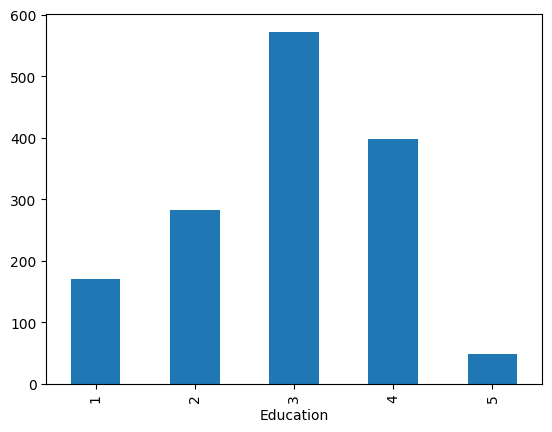

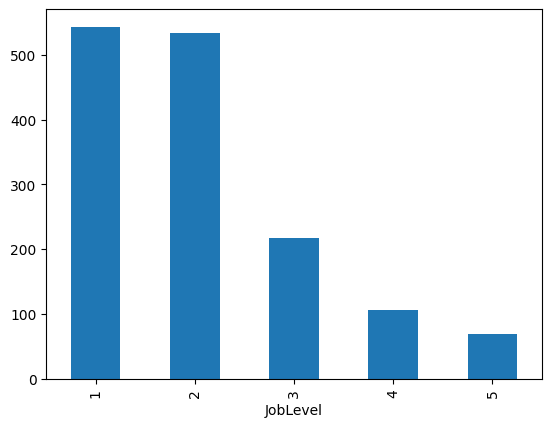

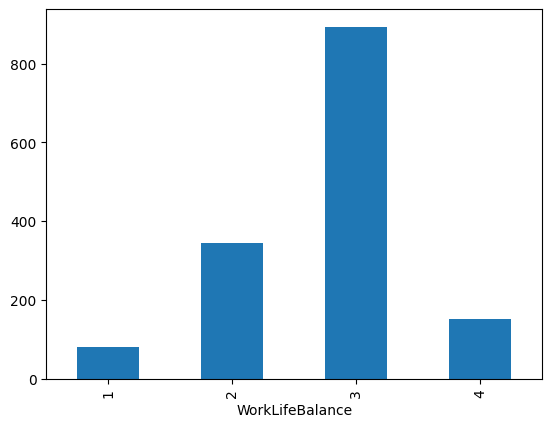

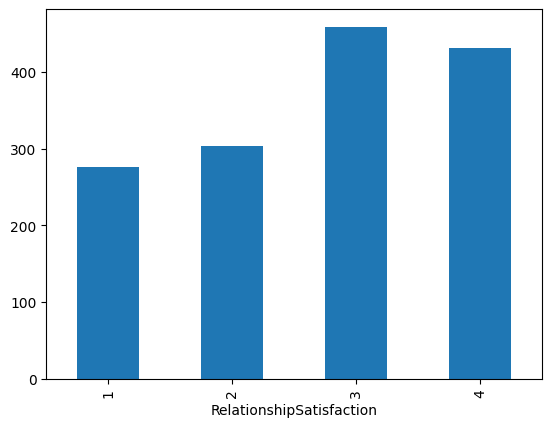

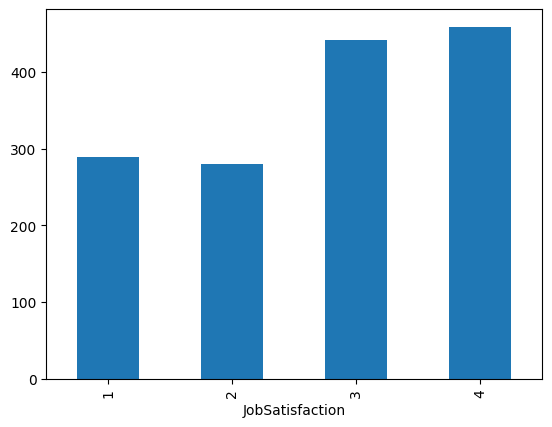

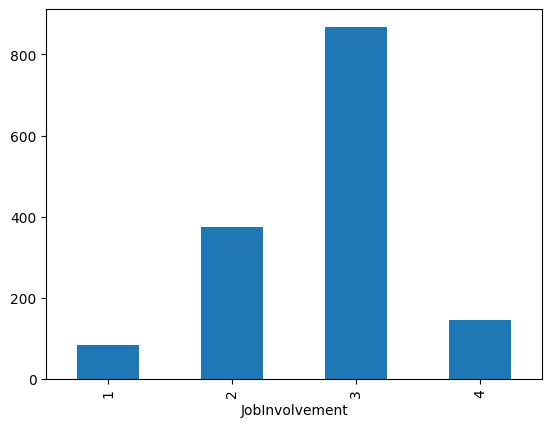

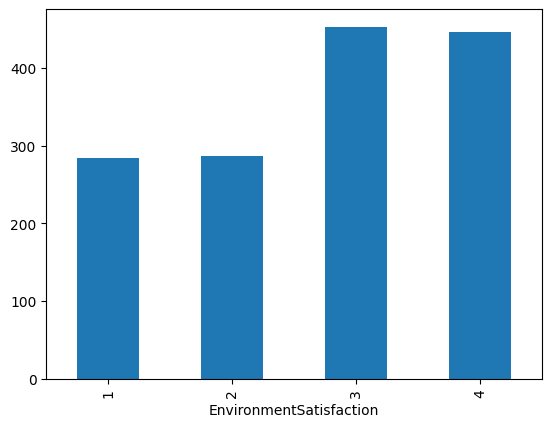

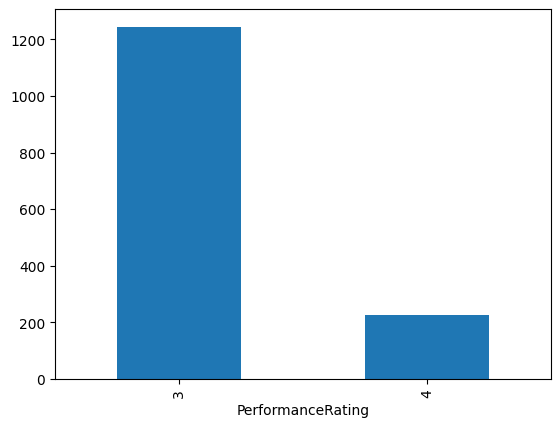

In [780]:
for cols in ordinal_cat_cols:
    df[cols].value_counts().sort_index().plot(kind='bar')
    plt.show()

## **Bi/ Multivariate Analysis**

**On Numerical - Numerical pairs:**

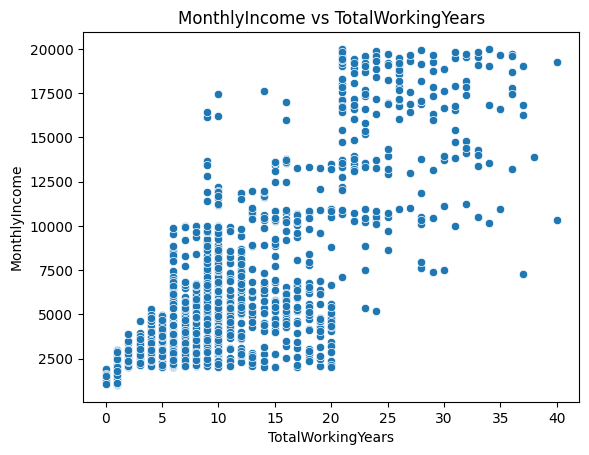

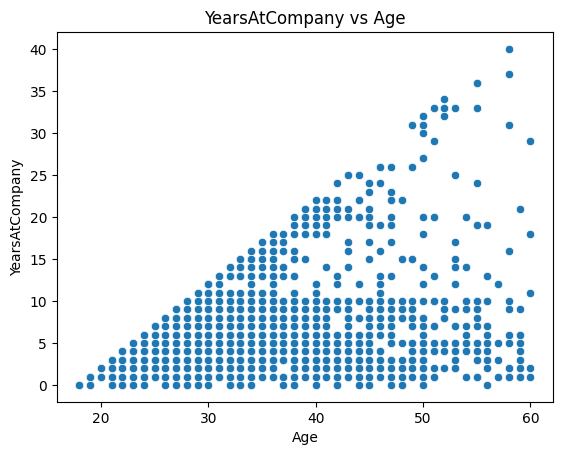

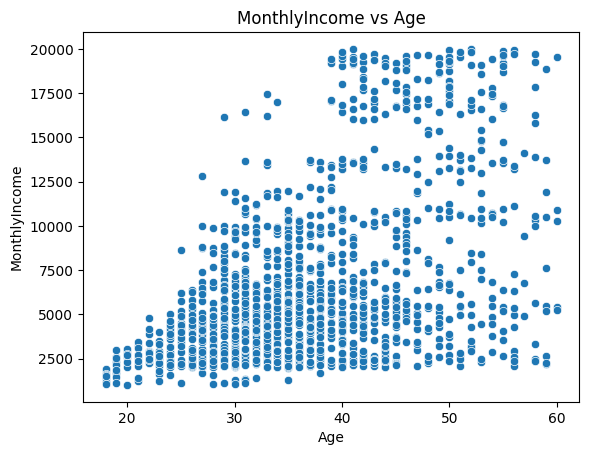

In [781]:
cont_pairs = [('TotalWorkingYears', 'MonthlyIncome'),
              ('Age', 'YearsAtCompany'),
              ('Age', 'MonthlyIncome')]

for x, y in cont_pairs:
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{y} vs {x}')
    plt.show()

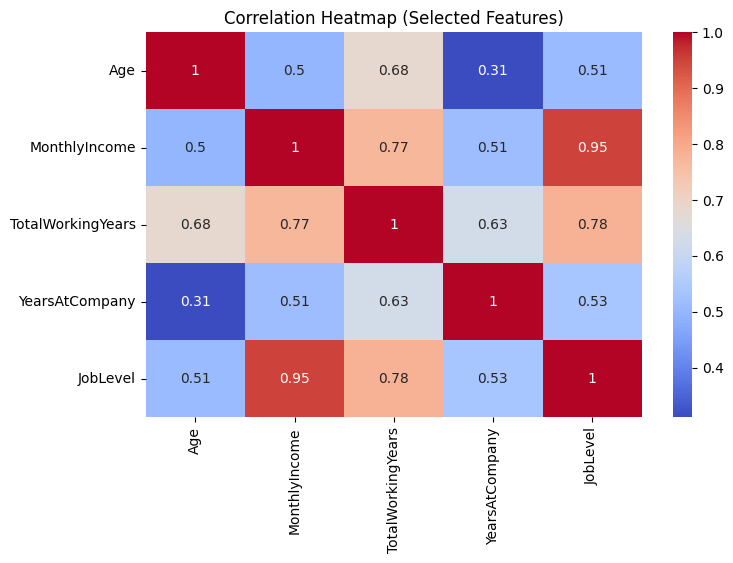

In [782]:
important_cols = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 
                  'YearsAtCompany', 
                  'JobLevel', 'Attrition']  # Add or remove as needed

plt.figure(figsize=(8, 5))
sns.heatmap(df[important_cols].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Selected Features)')
plt.show()

### Insights:
- As total working years increase, monthly income tends to increase, so a positive correlation
- Older employees generally have more years at the company, but with variation
- Older employees often earn more, but there are exceptions.
- TotalWorkingYears is strongly correlated wit JobLevel and MonthlyIncome
- YearsAtCompany and Age are weekley correlated

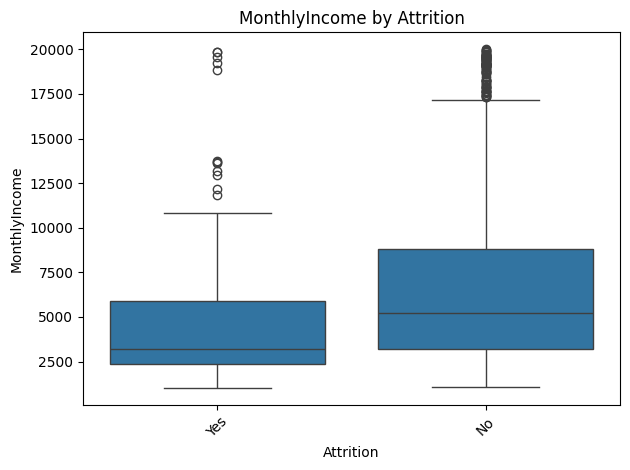

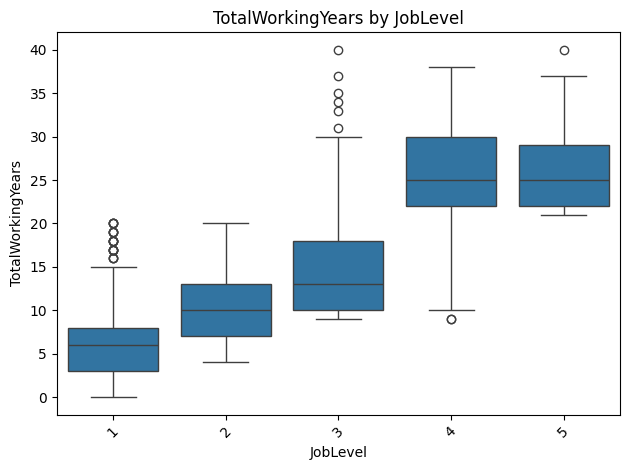

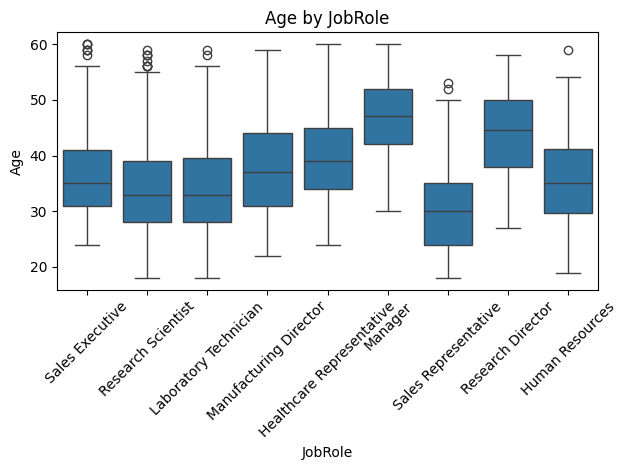

In [783]:
cat_cont_pairs = [('Attrition', 'MonthlyIncome'),
                  ('JobLevel', 'TotalWorkingYears'),
                  ('JobRole', 'Age')]

for cat, cont in cat_cont_pairs:
    sns.boxplot(data=df, x=cat, y=cont)
    plt.title(f'{cont} by {cat}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Insights
- Employees who left the company (Attrition = Yes) tend to have lower monthly income compared to those who stayed
- Higher JobLevels are associated with more total working years

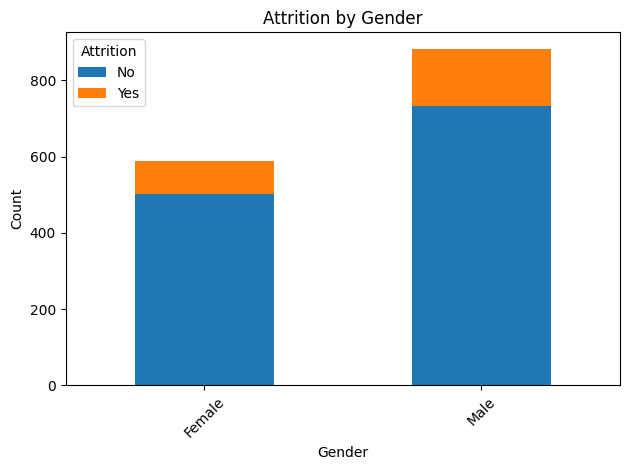

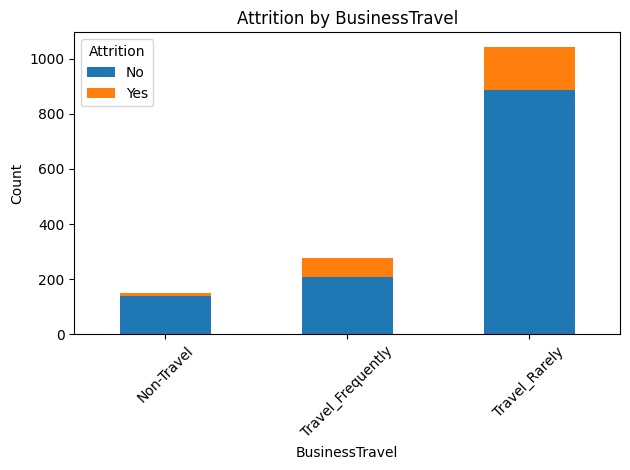

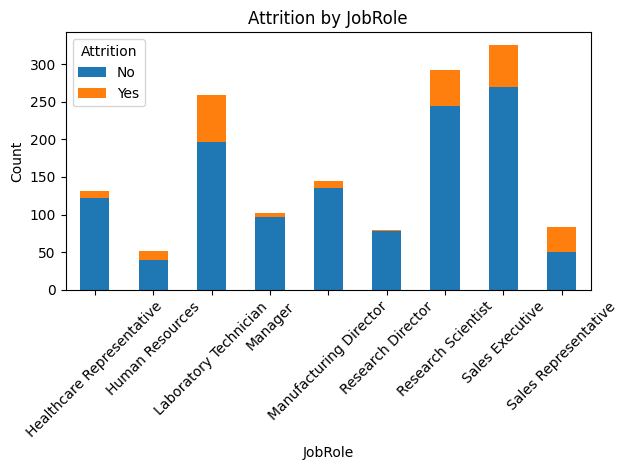

In [784]:
cat_pairs = [('Gender', 'Attrition'),
             ('BusinessTravel', 'Attrition'),
             ('JobRole', 'Attrition')]

for x, y in cat_pairs:
    pd.crosstab(df[x], df[y]).plot(kind='bar', stacked=True)
    plt.title(f'{y} by {x}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


### Insights:
- Slightly more males have left the company, but attrition rates between genders appear similar overall
- Employees with frequent travel show higher attrition than those who travel rarely or never

## Splitting Data

In [785]:
X= df.drop('Attrition', axis=1)
y= df['Attrition']
X.shape

(1470, 30)

In [786]:
le = LabelEncoder()
y = le.fit_transform(y)

In [787]:
y

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

In [788]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=42)

In [789]:
y_train

array([0, 0, 1, ..., 1, 0, 0], shape=(1029,))

# **DATA PREPROCESSING**

In [790]:
# Checking for missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

No missing vals✔️

In [792]:
from sklearn.base import BaseEstimator, TransformerMixin

class Capping(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        X = pd.DataFrame(X)
        X_capped = X.copy()
        for col in X.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            iqr = Q3 - Q1
            lower = Q1 - 1.5 * iqr
            upper = Q3 + 1.5 * iqr
            X_capped[col] = np.where(X_capped[col] < lower, lower,
                              np.where(X_capped[col] > upper, upper, X_capped[col]))
        return X_capped

    def get_feature_names_out(self, input_features=None):
        return input_features


In [793]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [794]:
num_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [795]:
right_skewed = df[num_cols].skew().sort_values(ascending=False)
right_skewed_cols = right_skewed[right_skewed > 0.5].index.tolist()

In [796]:
right_skewed_cols

['YearsSinceLastPromotion',
 'YearsAtCompany',
 'MonthlyIncome',
 'TotalWorkingYears',
 'NumCompaniesWorked',
 'StockOptionLevel',
 'DistanceFromHome',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'PercentSalaryHike',
 'TrainingTimesLastYear']

In [797]:
cat_cols = cat_cols.drop('Attrition')
cat_cols
# FunctionTransformer(cap_outliers)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [798]:
num_pipeline = Pipeline([
    ('capping', Capping()),
    ('power', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

In [799]:
cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

**Cols having outliers are almost the same as columns that are right skewed**

In [800]:
# Final preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, right_skewed_cols),
    ('num_rest', StandardScaler(), list(set(num_cols) - set(right_skewed_cols))),
    ('cat', cat_pipeline, cat_cols)
])

## **Final PIPELINE**

### **Applying sklearn's Logistic Regression**

In [801]:
sklearnpipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])
sklearnpipe.fit(X_train, y_train)
y_pred0=sklearnpipe.predict(X_test)
accuracy_score(y_test,y_pred0)

0.8571428571428571

In [818]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred0))
print(classification_report(y_test, y_pred0))


[[361  19]
 [ 44  17]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       380
           1       0.47      0.28      0.35        61

    accuracy                           0.86       441
   macro avg       0.68      0.61      0.64       441
weighted avg       0.83      0.86      0.84       441



### **Making my custom Logistic regression class using gradient descent and sigmoid function**

In [805]:
class LogisticGD:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept = None
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    def fit(self,X,y):
        X=np.insert(X, 0, 1 , axis=1)
        self.coef_=np.ones(X.shape[1])
        
    
        for i in range(self.epochs):
            y_hat= self.sigmoid(np.dot(X, self.coef_))
            self.coef_ = self.coef_ + self.lr * np.dot(y-y_hat,X)/X.shape[0]
        return self
    
    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        z = np.dot(X, self.coef_)
        y_hat = self.sigmoid(z)
        return np.where(y_hat >= 0.5, 1, 0)


In [823]:
# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('model', LogisticGD())
# ])

In [824]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),   # <-- Add SMOTE here
    ('model', LogisticGD())
])

pipeline.fit(X_train, y_train)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\mary3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mary3\AppData\Local\Temp\ipykernel_7896\1246785653.py", line 1, in <module>
    from imblearn.pipeline import Pipeline as ImbPipeline
  File "C:\Users\mary3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\__init__.py", line 52, in <module>
    from . import (
  File "C:\Users\mary3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\imblearn\combine\__init__.py", line 5, in <module>
    from ._smote_enn import SMOTEENN
  File "C:\Users\mary3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\l

In [807]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('num_rest', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [808]:
y_pred=pipeline.predict(X_test)

In [809]:
accuracy_score(y_test,y_pred)


0.8775510204081632

**Accuracy score of my custom linear reg class is better than sklearn's LinearRegression ✔️**

In [810]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[370  10]
 [ 44  17]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.63      0.28      0.39        61

    accuracy                           0.88       441
   macro avg       0.76      0.63      0.66       441
weighted avg       0.86      0.88      0.86       441



In [811]:
df['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

## Checking which features affects the prediction the most

In [812]:
coefficients= pipeline.named_steps['model'].coef_
coefficients

array([-2.48032876,  0.21171018,  0.20631617, -0.31391207, -0.38753304,
        0.49011925, -0.36834128,  0.23506485, -0.36944464, -0.17601041,
       -0.02661979, -0.13313873, -0.11256161, -0.15091368,  0.01071651,
        0.04562228,  0.29392847, -0.309533  , -0.94454819, -0.16832232,
       -0.15305219,  0.49325497, -0.05613952,  0.33917066,  0.89723953,
        0.09798503,  0.74975143,  1.10663669,  0.57672642,  0.51841914,
        0.56305608,  0.41792511,  0.30196921,  0.71077309, -0.13816058,
        0.43380965,  1.52157214])

In [ ]:
import pandas as pd

# Get feature names after preprocessing
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Get coefficients from logistic regression
coefficients = pipeline.named_steps['model'].coef_[1:]
#doing [1:] is a must as coef_ also has Wo value which is intercept_, so we need to exclude it

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by="Coefficient", key=abs, ascending=False)

importance_df.head(10)


,Feature,Coefficient
35,cat__OverTime_Yes,1.521572
26,cat__JobRole_Laboratory Technician,1.106637
17,cat__Department_Research & Development,-0.944548
23,cat__EducationField_Technical Degree,0.897240
25,cat__JobRole_Human Resources,0.749751
32,cat__JobRole_Sales Representative,0.710773
27,cat__JobRole_Manager,0.576726
29,cat__JobRole_Research Director,0.563056
28,cat__JobRole_Manufacturing Director,0.518419
20,cat__EducationField_Marketing,0.493255


In [822]:
import pickle
with open('Attrition.pkl', 'wb') as file:
    pickle.dump(pipeline,file)